In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
def create_dateframe():
    """
    create dataframe from news dataframe
    """
    df = pd.read_json('news.json')
    date_format = '%Y-%m-%d'
    df['date'] = pd.to_datetime(df['date'], format=date_format)
    # df = df.sort_values(by='date')
    df = df[df['date'] >= '2022-01-01']
    return df
df = create_dateframe()
df

,title,date,text
0,Last known speaker fights to preserve South Af...,2023-05-19,N|uu was spoken by one of many hunter-gatherer...
1,More than half of the world's large lakes are ...,2023-05-19,Report shows the world's most important freshw...
2,Pentagon accounting error overvalued Ukraine w...,2023-05-19,The error was the result of assigning a higher...
3,"At the G7 summit in Hiroshima, all eyes will b...",2023-05-18,Discussions on the issue will come at a crucia...
4,"Next five years to be hottest ever, likely cro...",2023-05-18,Report marks the first time the agency has for...
...,...,...,...
3088,"Behind Brazil's 'green' charcoal industry, ill...",2022-01-05,"This year, 66 workers were found in slavery-li..."
3089,The U.K. is being consumed by Brexit more than...,2022-01-05,"One year into ""going it alone,” Brexit and the..."
3090,President Emmanuel Macron tells French daily h...,2022-01-05,The cutting remark prompted howls of condemnat...
3091,Biden to speak 'truth' a year after U.S. Capit...,2022-01-05,"Four people died on the day of the riot, one C..."


In [32]:
anchors = [
    "ukraine",
    "ukrainian",
    "russia",
    "russian",
    "dpr",
    "lpr",
    "putin",
    "zelensky",
    "war"
]

In [33]:
def check(string: str):
    for word in anchors:
        if word in string.lower():
            return True
    return False

In [37]:
ukr_df = df[df['title'].apply(lambda x: check(x))]
ukr_df = ukr_df.reset_index()
ukr_df['year'] = pd.DatetimeIndex(ukr_df['date']).year
ukr_df['month'] = pd.DatetimeIndex(ukr_df['date']).month
ukr_df

,index,title,date,text,year,month
0,2,Pentagon accounting error overvalued Ukraine w...,2023-05-19,The error was the result of assigning a higher...,2023,5
1,3,"At the G7 summit in Hiroshima, all eyes will b...",2023-05-18,Discussions on the issue will come at a crucia...,2023,5
2,14,Wagner’s Prigozhin warns he’s ready to withdra...,2023-04-30,The founder of Russia's Wagner mercenary group...,2023,4
3,15,U.S. wires Ukraine with radiation sensors to d...,2023-04-30,"In part, the goal is to make sure that if Russ...",2023,4
4,21,"In first, Kyiv says it shot down volley of Rus...",2023-05-17,"When asked about the Ukrainian claim, Russian ...",2023,5
...,...,...,...,...,...,...
1200,3039,"Russia, at an impasse with the West, warns it ...",2022-01-14,Hopes faded that negotiators could forge a pat...,2022,1
1201,3044,"NATO and Russia talk frankly, but past one ano...",2022-01-13,NATO leaders rejected outright Russian demands...,2022,1
1202,3071,Putin sends message to the West as his troops ...,2022-01-08,Ahead of high-stakes security talks with the U...,2022,1
1203,3081,Britain warns Russia over Ukraine: We're worki...,2022-01-06,Britain warned Moscow on Thursday that it was ...,2022,1


In [78]:
months_ukr_df = ukr_df.pivot_table(columns=['year', 'month'], aggfunc='size')
months_ukr_df = months_ukr_df.reset_index()
months_ukr_df.columns = ['year', 'month', 'count']
months_ukr_df['date_plt'] = months_ukr_df['year'].apply(str) + '-' + months_ukr_df['month'].apply(str)
months_ukr_df

,year,month,count,date_plt
0,2022,1,38,2022-1
1,2022,2,99,2022-2
2,2022,3,152,2022-3
3,2022,4,113,2022-4
4,2022,5,97,2022-5
5,2022,6,81,2022-6
6,2022,7,55,2022-7
7,2022,8,49,2022-8
8,2022,9,72,2022-9
9,2022,10,65,2022-10


In [76]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
months_df = df.pivot_table(columns=['year', 'month'], aggfunc='size')
months_df = months_df.reset_index()
months_df.columns = ['year', 'month', 'count']
months_df['date_plt'] = months_df['year'].apply(str) + '-' + months_df['month'].apply(str)
months_df

,year,month,count,date_plt
0,2022,1,147,2022-1
1,2022,2,178,2022-2
2,2022,3,205,2022-3
3,2022,4,175,2022-4
4,2022,5,190,2022-5
5,2022,6,195,2022-6
6,2022,7,188,2022-7
7,2022,8,155,2022-8
8,2022,9,217,2022-9
9,2022,10,218,2022-10


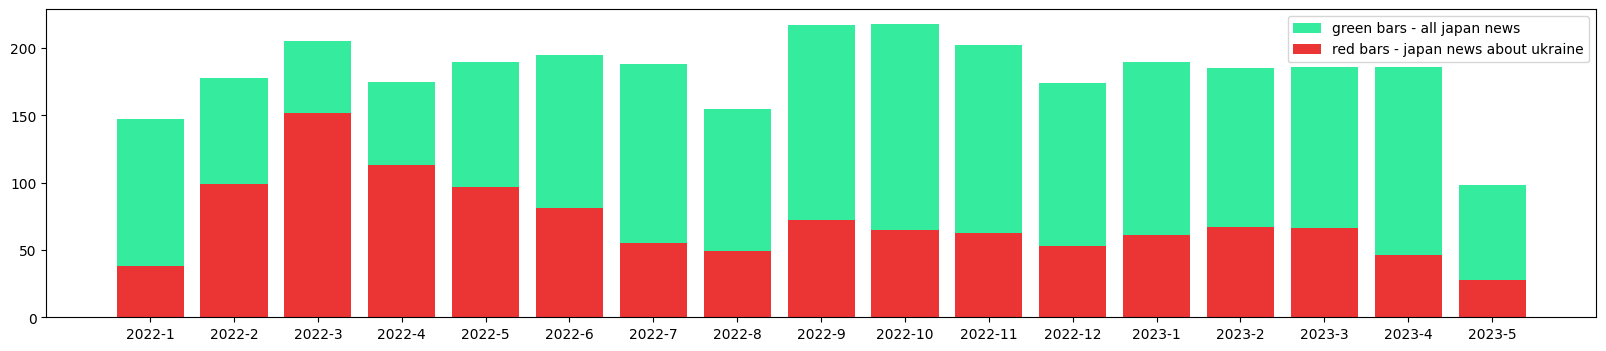

In [82]:
plt.figure(figsize=(20, 4))
plt.bar(months_df['date_plt'], months_df['count'], color='#34eb9e')   
plt.bar(months_ukr_df['date_plt'], months_ukr_df['count'], color='#eb3434')
plt.legend(['green bars - all japan news', 'red bars - japan news about ukraine'])
plt.show()